### Import packages

In [1]:
import numpy as np
import re
import string

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
stop_words = stopwords.words()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cjb224\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cjb224\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\cjb224\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\cjb224\AppData\Roaming\nltk_data...


https://www.kaggle.com/code/ankumagawa/sentimental-analysis-using-naive-bayes-classifier

### Import Dataset: GoEmotions

In [1]:
from datasets import load_dataset

dataset = load_dataset("go_emotions", "raw")

Generating train split:   0%|          | 0/211225 [00:00<?, ? examples/s]

### Creating classes

In [ ]:
positive_em = ['admiration', 'amusement', 'approval', 'caring', 'desire', 'excitement', 'gratitude', 'joy', 'love', 'optimism', 'pride', 'relief']
negative_em = ['anger', 'annoyance', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'fear', 'grief', 'nervousness', 'remorse', 'sadness']
neutral_em = ['neutral']
ambiguous_em = ['curiosity', 'realization', 'surprise', 'confusion']

In [256]:
train_ds = dataset["train"]

positive = np.zeros(len(train_ds))
for i in positive_em:
    array = np.array(train_ds[i])
    positive = positive + array
    
negative = np.zeros(len(train_ds))
for i in negative_em:
    array = np.array(train_ds[i])
    negative = negative + array

neutral = np.array(train_ds['neutral'])

ambiguous = np.zeros(len(train_ds))
for i in ambiguous_em:
    array = np.array(train_ds[i])
    ambiguous = ambiguous + array
    

array([0, 0, 1, ..., 0, 0, 0])

In [257]:
xpositive = np.array([1 if row > 0 else 0 for row in positive])
xnegative = np.array([1 if row > 0 else 0 for row in negative])
xambiguous = np.array([1 if row > 0 else 0 for row in ambiguous])
xneutral = np.array([1 if row > 0 else 0 for row in neutral])

add_sentiment = xpositive + xnegative + xambiguous + xneutral

remove_indices = [i for i, x in enumerate(add_sentiment) if x > 1]
keep_indices = [i for i, x in enumerate(add_sentiment) if x < 2]

In [231]:
positive = np.array([1 if row > 0 else 0 for row in positive])
negative = np.array([-1 if row > 0 else 0 for row in negative])
ambiguous = np.array([2 if row > 0 else 0 for row in ambiguous])
neutral = np.array([0 if row > 0 else 0 for row in neutral])

sentiment = positive + negative + ambiguous + neutral
sentiment = [i for j, i in enumerate(sentiment) if j not in remove_indices]


197044


In [232]:
new_dataset = train_ds.map(remove_columns=['id', 'author', 'subreddit', 'link_id', 'parent_id', 'created_utc', 'rater_id', 'example_very_unclear', 'excitement', 'sadness','admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse', 'surprise','neutral'])
new_dataset = new_dataset.select(keep_indices)
new_dataset = new_dataset.add_column("sentiment",sentiment)

In [234]:
import pandas as pd
# Change into a dataset to clean and tokenise data
data = pd.DataFrame(new_dataset)

### Clean text data:

In [235]:
# function for cleaning the data
def cleaning(text):        
    # converting to lowercase, removing URL links, special characters, punctuations...
    text = text.lower() # converting to lowercase
    text = re.sub('https?://\S+|www\.\S+', '', text) # removing URL links
    text = re.sub(r"\b\d+\b", "", text) # removing number 
    text = re.sub('<.*?>+', '', text) # removing special characters, 
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # punctuations
    text = re.sub('\n', '', text)
    text = re.sub('[’“”…]', '', text)
    
    # removing emoji: 
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)   

    # removing short form: 
    text=re.sub("isn't",'is not',text)
    text=re.sub("he's",'he is',text)
    text=re.sub("wasn't",'was not',text)
    text=re.sub("there's",'there is',text)
    text=re.sub("couldn't",'could not',text)
    text=re.sub("won't",'will not',text)
    text=re.sub("they're",'they are',text)
    text=re.sub("she's",'she is',text)
    text=re.sub("There's",'there is',text)
    text=re.sub("wouldn't",'would not',text)
    text=re.sub("haven't",'have not',text)
    text=re.sub("That's",'That is',text)
    text=re.sub("you've",'you have',text)
    text=re.sub("He's",'He is',text)
    text=re.sub("what's",'what is',text)
    text=re.sub("weren't",'were not',text)
    text=re.sub("we're",'we are',text)
    text=re.sub("hasn't",'has not',text)
    text=re.sub("you'd",'you would',text)
    text=re.sub("shouldn't",'should not',text)
    text=re.sub("let's",'let us',text)
    text=re.sub("they've",'they have',text)
    text=re.sub("You'll",'You will',text)
    text=re.sub("i'm",'i am',text)
    text=re.sub("we've",'we have',text)
    text=re.sub("it's",'it is',text)
    text=re.sub("don't",'do not',text)
    text=re.sub("that´s",'that is',text)
    text=re.sub("I´m",'I am',text)
    text=re.sub("it’s",'it is',text)
    text=re.sub("she´s",'she is',text)
    text=re.sub("he’s'",'he is',text)
    text=re.sub('I’m','I am',text)
    text=re.sub('I’d','I did',text)
    text=re.sub("he’s'",'he is',text)
    text=re.sub('there’s','there is',text)
    
    return text

dt = data['text'].apply(cleaning)

In [236]:
dt = pd.DataFrame(dt)
dt['sentiment'] = data['sentiment']

In [237]:
# remove stop word
dt['no_sw'] = dt['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [238]:
#Working with the most Frequent Words: 
from collections import Counter
cnt = Counter()
for text in dt["no_sw"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)

[('love', 7603),
 ('youre', 5474),
 ('time', 5319),
 ('make', 3779),
 ('ive', 3522),
 ('feel', 3370),
 ('hes', 3291),
 ('back', 3278),
 ('great', 3118),
 ('hope', 3009)]

In [239]:
# Remove the most frequent words:
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])
dt["wo_stopfreq"] = dt["no_sw"].apply(lambda text: remove_freqwords(text))

In [240]:
# Lemmatization: Lemmatization is converting the word to its base form or lemma by removing affixes from the inflected words. 
# It helps to create better features for machine learning and NLP models hence it is an important preprocessing step.
wordnet_lem = WordNetLemmatizer()
dt['wo_stopfreq_lem'] = dt['wo_stopfreq'].apply(wordnet_lem.lemmatize)

### Tokenisation

In [241]:
# create the cleaned data for the train-test split:
nb=dt.drop(columns=['text','no_sw', 'wo_stopfreq'])
nb.columns=['sentiment','review']

0        -1
1         0
2         0
3         1
4         0
         ..
197039    1
197040    1
197041    1
197042   -1
197043    0
Name: sentiment, Length: 197044, dtype: int64

In [242]:
tokenized_review=nb['review'].apply(lambda x: x.split())
tokenized_review.head(5)

0                                         [game, hurt]
1    [sexuality, grouping, category, makes, differe...
2                                               [fuck]
3                                             [reddit]
4                                             [falcon]
Name: review, dtype: object

In [243]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(nb['review'])

### Train-test split

In [244]:
from sklearn.model_selection import train_test_split
X=text_counts
y=nb['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=30)

### Naive Bayes

In [276]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
MNB = MultinomialNB()
MNB.fit(X_train, y_train)

from sklearn import metrics
predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)

print('MultinominalNB model accuracy is',str('{:04.2f}'.format(accuracy_score*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))

MultinominalNB model accuracy is 53.19%
------------------------------------------------
Confusion Matrix:
      0     1      2    3
0  5067  1982   1778  246
1  2219  4630   4361  576
2  1345  2272  10431  291
3   745  1209   1422  835
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

          -1       0.54      0.56      0.55      9073
           0       0.46      0.39      0.42     11786
           1       0.58      0.73      0.65     14339
           2       0.43      0.20      0.27      4211

    accuracy                           0.53     39409
   macro avg       0.50      0.47      0.47     39409
weighted avg       0.52      0.53      0.52     39409



In [310]:
report = classification_report(y_test, predicted, output_dict=True)
df_report = pd.DataFrame(report).transpose()


type(df_report)

df_report = df_report.drop(['accuracy','macro avg','weighted avg'])
df_report = df_report.drop(columns=['support'])

df_report = df_report.rename(columns={'precision': 'Precision', 'recall': 'Recall', 'f1-score': 'F-measure'})


df_report.insert(0, 'Class', ['negative','neutral','positive','ambiguous'])


display(df_report)

,Class,Precision,Recall,F-measure
-1,negative,0.540422,0.558470,0.549298
0,neutral,0.458734,0.392839,0.423237
1,positive,0.579758,0.727457,0.645263
2,ambiguous,0.428645,0.198290,0.271148


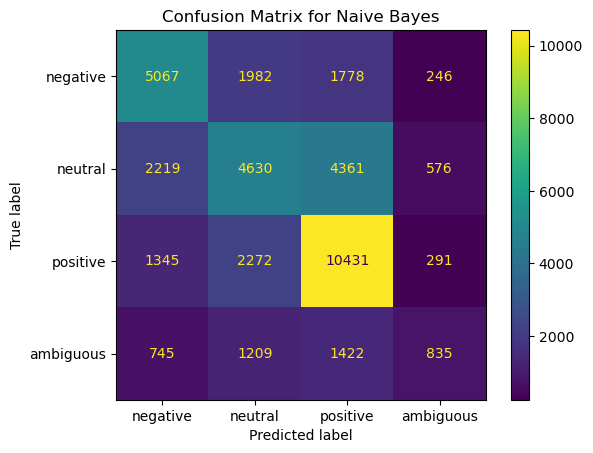

In [270]:
from sklearn.metrics import ConfusionMatrixDisplay
import warnings
import matplotlib.pyplot as plt 
warnings.filterwarnings("ignore")
ConfusionMatrixDisplay.from_estimator(MNB, X_test, y_test,display_labels=['negative','neutral','positive','ambiguous'],values_format='d') 
plt.title("Confusion Matrix for Naive Bayes")
plt.show()

#plt.savefig('NB_confusionmatrix.png')